<a href="https://colab.research.google.com/github/fizzzaj-07/Data-Science-Assignment/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

100%|██████████| 142k/142k [00:00<00:00, 49.1MB/s]

Extracting files...


In [ ]:
import os
os.listdir(path)

['bank.csv']

In [ ]:
import pandas as pd

df = pd.read_csv(os.path.join(path, 'bank.csv'))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Problem Statement:
The objective of this project is to predict whether a bank customer will subscribe to a term deposit based on demographic, financial, and campaign-related features. This analysis will help the bank improve targeted marketing strategies and increase campaign efficiency.

# **New** Section

Dataset Description

The Bank Marketing Dataset contains data related to direct marketing campaigns of a Portuguese banking institution. It includes features such as:
Customer demographic information: age, job, marital, education
Financial information: balance, housing, loan
Campaign information: contact, day, month, duration, campaign, pdays, previous, poutcome
Target variable: deposit – indicates whether the customer subscribed to a term deposit (yes or no)
This dataset provides insights into customer behavior, which can be used to build predictive models for marketing campaigns.

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Separate categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.drop('deposit')

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target
df_encoded['deposit'] = df_encoded['deposit'].map({'yes':1, 'no':0})

df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

# Features & target
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = lr_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
print("\nROC-AUC Score:", roc_auc)

Confusion Matrix:
[[975 191]
 [231 836]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233


ROC-AUC Score: 0.8977961968360016


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print("\nROC-AUC Score (Random Forest):", roc_auc_rf)

Confusion Matrix (Random Forest):
[[956 210]
 [145 922]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1166
           1       0.81      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233


ROC-AUC Score (Random Forest): 0.9127766408760556


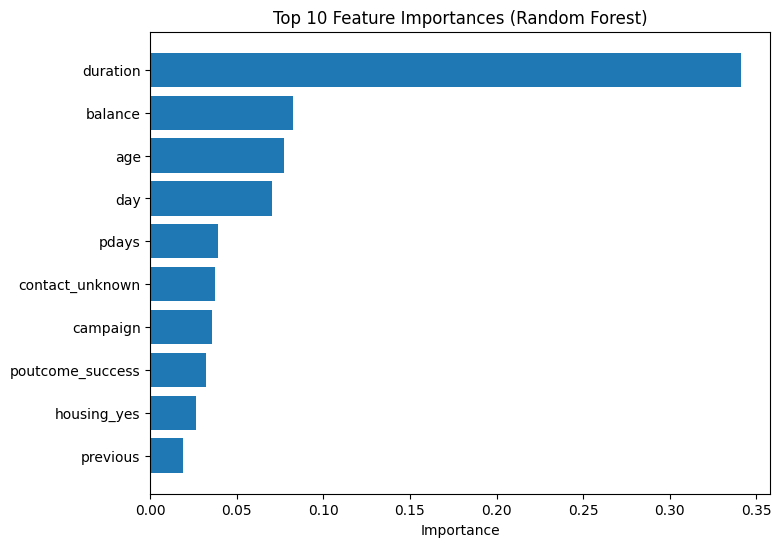

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot top 10 features
plt.figure(figsize=(8,6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.barh(range(10), importances[indices[:10]][::-1], align='center')
plt.yticks(range(10), [features[i] for i in indices[:10]][::-1])
plt.xlabel("Importance")
plt.show()

Conclusion:
The analysis of the Bank Marketing Dataset using Logistic Regression and Random Forest shows that Random Forest performs slightly better in terms of accuracy and ROC-AUC score. Feature importance analysis indicates that variables such as duration, previous contacts, and customer balance have the strongest influence on whether a customer subscribes to a term deposit.
Insights & Recommendations:
Customers with longer call durations are more likely to subscribe — marketing campaigns should focus on personalized calls.
Previous campaign success and customer financial status (balance) are strong predictors — target high-probability customers first.
Feature importance analysis helps identify which attributes drive customer decisions, enabling data-driven marketing strategies.